In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
import warnings
warnings.filterwarnings('ignore')

# Part1: Data Loading and Cleaning up

In the first part of the project we will start by loading the data and cleaning up any problems within the data. 

In [6]:
import pandas as pd

cnames = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
df = pd.read_csv('iris_not_clean.data', sep="|", names=cnames, skiprows=[1])

In [7]:
df.head()
df.tail()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


,sepal length,sepal width,petal length,petal width,class
149,6.7,3.0,5.2,2.3,Iris-virginica
150,6.3,2.5,5.0,1.9,Iris-virginica
151,6.5,3.0,5.2,2.0,Iris-virginica
152,6.2,3.4,5.4,2.3,Iris-virginica
153,5.9,3.0,5.1,1.8,Iris-virginica


------------------------------

B) Now some exploring after the simple cleanup:
<br>
- How many rows and colums are in the file
- How many nulls in the file
- Which rows contains nans and how many nans in each of these rows
- How many nans per columns?
- The 36th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" based on the original paper. Is that what you have? If not, fix it
- The 39th sample: 4.9,3.6,1.4,0.1,"Iris-setosa",  where the errors are in the second and third features. Fix it

In [8]:
df.shape

(154, 5)

In [9]:
df["class"].value_counts()

class
Iris-setosa        51
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

#### Check if nulls are there

In [10]:
df.isnull().sum().sum()

13

#### How many rows contain nans and how many nans per row, column

In [11]:
df.isna().sum()

sepal length    2
sepal width     2
petal length    3
petal width     3
class           3
dtype: int64

In [12]:
mask = df.isnull().any(axis=1) # https://saturncloud.io/blog/python-pandas-selecting-rows-whose-column-value-is-null-none-nan/
df[mask]

,sepal length,sepal width,petal length,petal width,class
28,5.2,3.4,NaN,0.2,Iris-setosa
29,NaN,NaN,NaN,NaN,NaN
33,#is this correct?,NaN,NaN,NaN,NaN
45,NaN,3.2,2.1,NaN,NaN


#### The 36th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" based on the original paper. Is that what you have? If not, fix it

In [13]:
df.iloc[36]

sepal length            4.9
sepal width             3.1
petal length            1.5
petal width             0.1
class           Iris-setosa
Name: 36, dtype: object

In [14]:
df.at[36, 'petal width'] = 0.2

#### The 39th sample: 4.9,3.6,1.4,0.1,"Iris-setosa", where the errors are in the second and third features. Fix it

In [15]:
df.iloc[39]

sepal length            4.9
sepal width             3.1
petal length            1.5
petal width             0.1
class           Iris-setosa
Name: 39, dtype: object

In [16]:
df.loc[39, ["sepal width", "petal length"]] = [3.6, 1.4]

In [17]:
df.loc[[36, 39]]

,sepal length,sepal width,petal length,petal width,class
36,4.9,3.1,1.5,0.2,Iris-setosa
39,4.9,3.6,1.4,0.1,Iris-setosa


# Part 2: Stastical Exploring
In this part we will understand a little more about the data and do some plottings
- What is the mean and variance for each column and use the function describe to get insights about the data
- Drop the nan rows
- Recaluclate the mean and variance for each column
- What is the correlation between the fourth column and each of the other three columns individually? Any observations
- How many records exist for each class. # Hint, you can do this in one line by using groupby
- Change the random seed to 1234 and randomly pick 20 samples of the data and display it
- Plot histogram for all the data attributes (expected four plots)
- Plot histogram for all the data attributes per class, i.e. grouped by classes. Expected 12 plots. Figure out the best way to put the plots together in a way that shows how each attribute is different for each class

In [18]:
# Solve Here
import matplotlib.pyplot as plt
import numpy as np

In [19]:
df.describe()

,sepal width,petal length,petal width
count,152.000000,151.000000,151.000000
mean,3.060526,3.746358,1.192715
std,0.434011,1.765475,0.764033
min,2.000000,1.000000,0.100000
25%,2.800000,1.600000,0.300000
50%,3.000000,4.300000,1.300000
75%,3.325000,5.100000,1.800000
max,4.400000,6.900000,2.500000


Instead of info on 4 numerical data columns we get 3. 

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  152 non-null    object 
 1   sepal width   152 non-null    float64
 2   petal length  151 non-null    float64
 3   petal width   151 non-null    float64
 4   class         151 non-null    object 
dtypes: float64(3), object(2)
memory usage: 6.1+ KB


0-th column is not of float data type, so we need to convert it into that.

In [21]:
df["sepal length"] = pd.to_numeric(df["sepal length"], errors="coerce", downcast="float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  151 non-null    float32
 1   sepal width   152 non-null    float64
 2   petal length  151 non-null    float64
 3   petal width   151 non-null    float64
 4   class         151 non-null    object 
dtypes: float32(1), float64(3), object(1)
memory usage: 5.5+ KB


In [22]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Mean for numeric data from describe():

In [23]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,151.000000,152.000000,151.000000,151.000000
mean,5.833775,3.060526,3.746358,1.192715
std,0.833618,0.434011,1.765475,0.764033
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.325000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Variance for each numeric column:

In [24]:
df.iloc[:,:-1].var()

sepal length    0.694918
sepal width     0.188365
petal length    3.116903
petal width     0.583747
dtype: float64

#### Drop the NaN rows

In [25]:
df = df.dropna()

In [26]:
df.info()
df.isna().sum().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 153
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float32
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float32(1), float64(3), object(1)
memory usage: 6.4+ KB


0

#### Recaluclate the mean and variance for each column

In [27]:
df.iloc[:,:-1].mean()
df.iloc[:,:-1].var()

sepal length    5.838000
sepal width     3.057333
petal length    3.757333
petal width     1.199333
dtype: float64

sepal length    0.696868
sepal width     0.189979
petal length    3.119510
petal width     0.581006
dtype: float64

#### What is the correlation between the fourth column and each of the other three columns individually? Any observations

In [28]:
print("petal width - sepal length:", df["petal width"].corr(df["sepal length"]))
print("petal width - sepal width:", df["petal width"].corr(df["sepal width"]))
print("petal width - petal length:", df["petal width"].corr(df["petal length"]))

petal width - sepal length: 0.8197887433221841
petal width - sepal width: -0.366125932536439
petal width - petal length: 0.9628647296230708


Petal width has strong positive correlation with both length variables (the greater the P.width, the grater the other two variables, the correlatoin between the Petal width and Petal length is even very strong) and moderate negative correlation with sepal width variable (the greater the P.width the less the sepal width).

#### How many records exist for each class. # Hint, you can do this in one line by using groupby

In [29]:
df["class"].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [30]:
df.groupby("class").count()

,sepal length,sepal width,petal length,petal width
class,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


#### Change the random seed to 1234 and randomly pick 20 samples of the data and display it

In [31]:
# from numpy import random
import numpy as np
np.random.seed(1234)

In [32]:
df.sample(n=20)

,sepal length,sepal width,petal length,petal width,class
95,6.1,3.0,4.6,1.4,Iris-versicolor
67,6.1,2.9,4.7,1.4,Iris-versicolor
107,6.3,2.9,5.6,1.8,Iris-virginica
6,4.6,3.4,1.4,0.3,Iris-setosa
63,5.2,2.7,3.9,1.4,Iris-versicolor
31,4.8,3.1,1.6,0.2,Iris-setosa
27,5.2,3.5,1.5,0.2,Iris-setosa
38,5.5,3.5,1.3,0.2,Iris-setosa
103,5.7,2.8,4.1,1.3,Iris-versicolor
126,7.7,2.8,6.7,2.0,Iris-virginica


#### Plot histogram for all the data attributes (expected four plots)

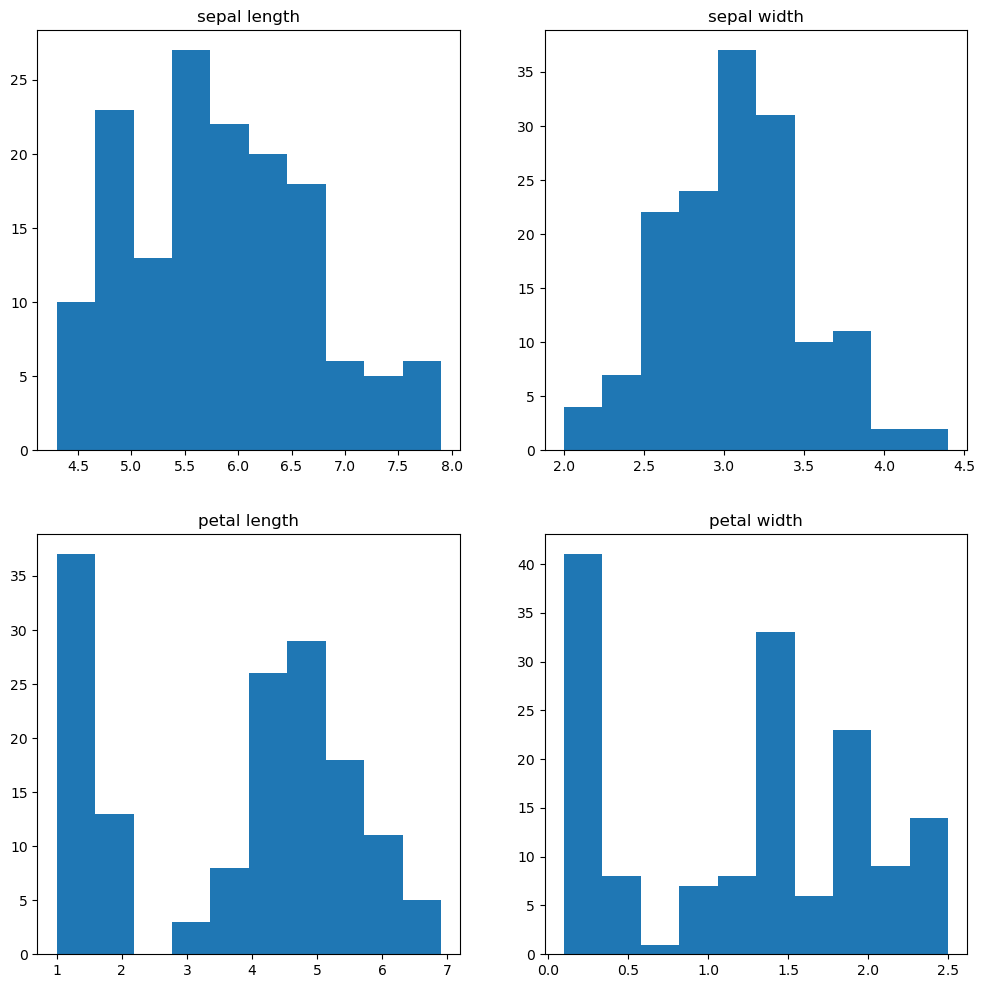

In [33]:
plt.figure(figsize=(12,12))
for var in list(df.columns[0:4]): # iter over columns except for class
    plt.subplot(2,2,list(df.columns[:4]).index(var)+1, title=var) # number of subplot is the index of the [list of columns omitting the class column] +1
    plt.hist(df[var[:]]) # plot content of each column
plt.show();

#### Plot histogram for all the data attributes per class, i.e. grouped by classes. Expected 12 plots. Figure out the best way to put the plots together in a way that shows how each attribute is different for each class

In [34]:
c = df['class'].unique()
c

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

I think the best way to display all content is to draw all **class-wise plots horizontally** and **variable-wise plots vertically**. Thus all "Iris-setosa" info is from left to right, and all "sepal length" info through each class is from top to bottom.

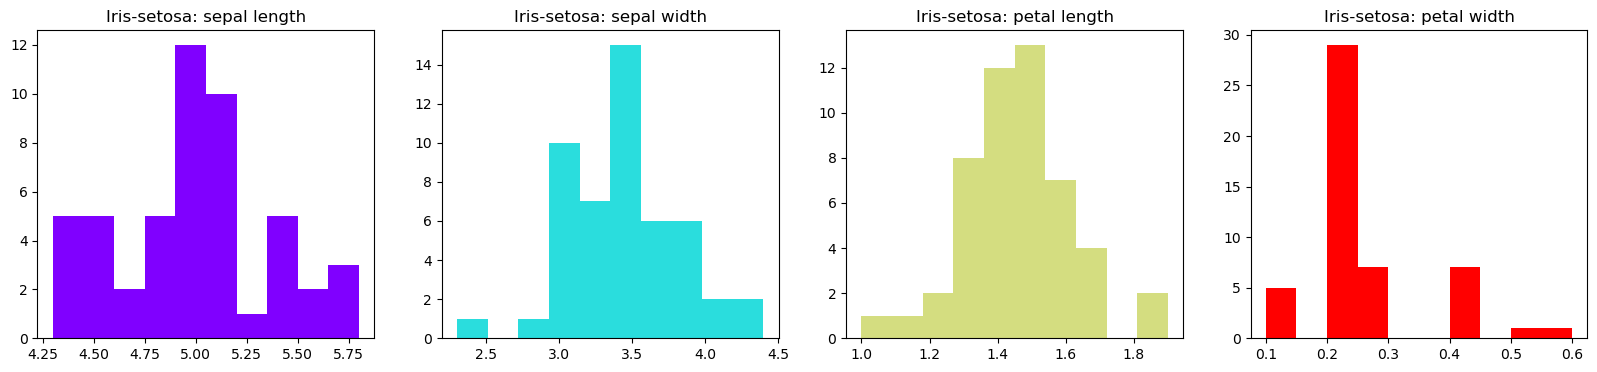

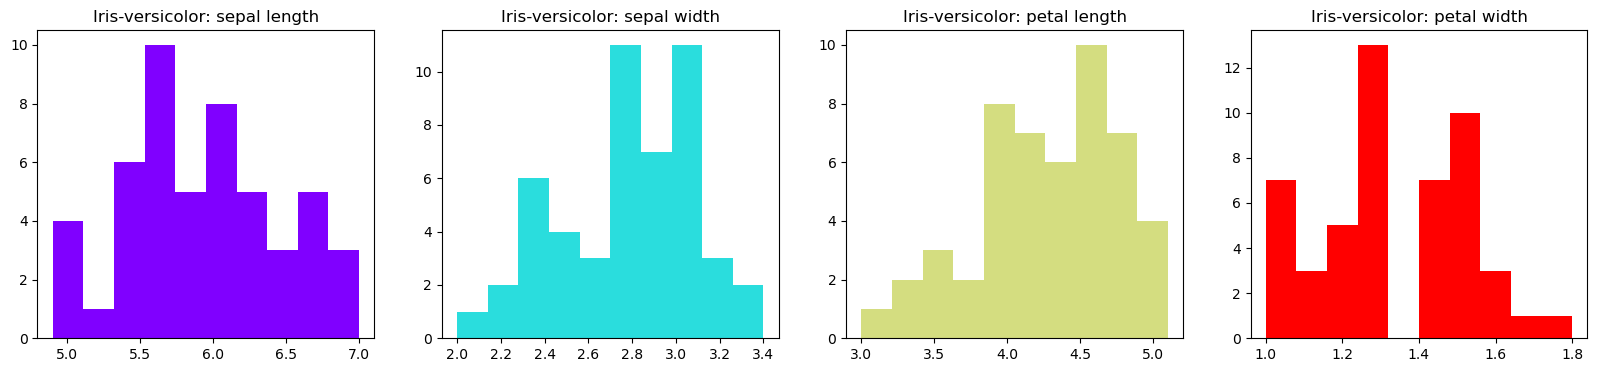

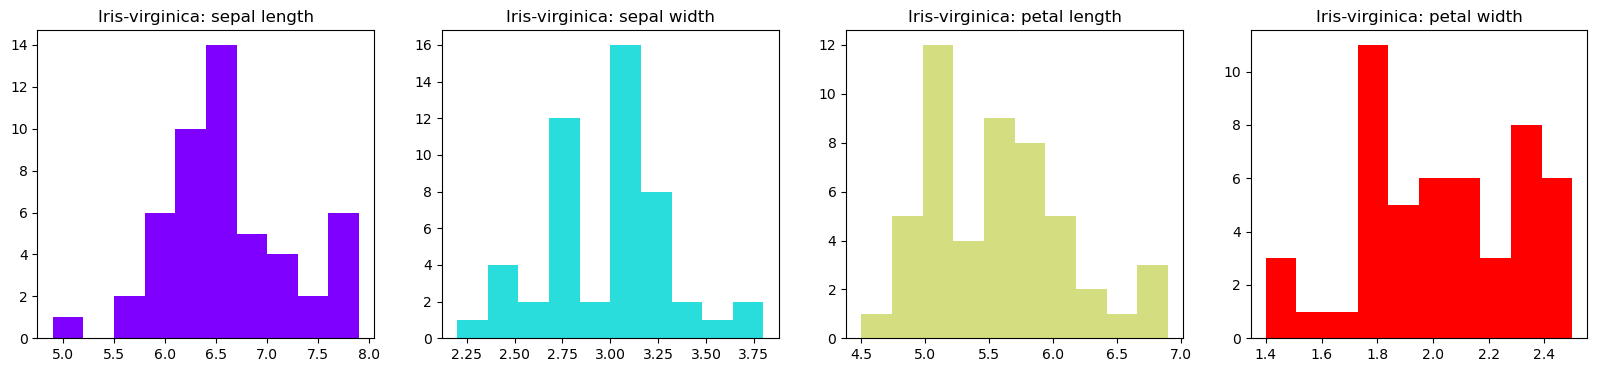

In [35]:
for klass in df["class"].unique(): # get list of unique class names to iterate over
    
    plt.figure(figsize = (20,4))
    
    subset = df[df["class"] == klass].iloc[:, :4] # get subset for each klass
    
    for i in range(4):
        colors = plt.cm.rainbow(np.linspace(0, 1, 4))
        plt.subplot(1,4,i+1, title=f"{klass}: {subset.columns[i]}")
        plt.hist(subset.iloc[:,i], color=colors[i])
plt.show();

# Part 3: Statistical Analysis 
In this part, we will explore some curve fitting and dimensionality reductions attributes


- Do a curve fitting for the petal-length
- Plot the normalized histogrm of the petal-length and the estimated pdf on the same figure
- Generate new 500 samples using the estimated pdf for the petal-length 
- Calculate the mean of the new samples and compare how close it is to the mean of the given data

In [36]:
import scipy.stats

petal_l = df['petal length']
petal_l_xrange = np.linspace(min(petal_l), max(petal_l), 150) # generate 150 values for x to eval PDF within the dataset range 

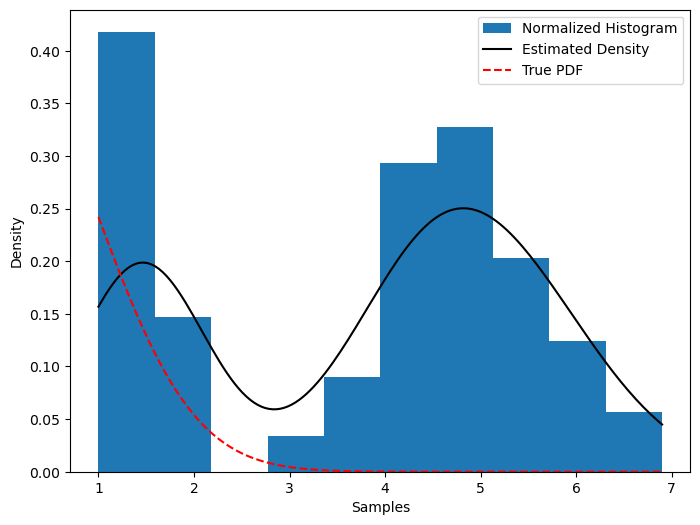

In [37]:
kde1 = scipy.stats.gaussian_kde(petal_l)  # estimate the PDF for dataset

fig = plt.figure(figsize=(8, 6))

plt.hist(petal_l, density=True, label='Normalized Histogram')  # this is how the dataset as probabilities looks like. There're a lot of values betweem 1 and 2, no values between 2 and 3 and over 7.

plt.plot(petal_l_xrange, kde1(petal_l_xrange), 'k-', label="Estimated Density")  # test the fit / plot estimated density
plt.plot(petal_l_xrange, scipy.stats.norm.pdf(petal_l_xrange), 'r--', label="True PDF")  # show the real prob distribution for dataset
plt.xlabel('Samples')
plt.ylabel('Density')
plt.legend()
plt.show();

There are two distinctive subgroups of data (gathering around 1 and 2 and another one around 4,5,6 values on x-axis), that's why we have this bimodal dist shape with two "peaks".

#### Generate new 500 samples using the estimated pdf for the petal-length

In [38]:
new_samples = kde1.resample(500)[0]

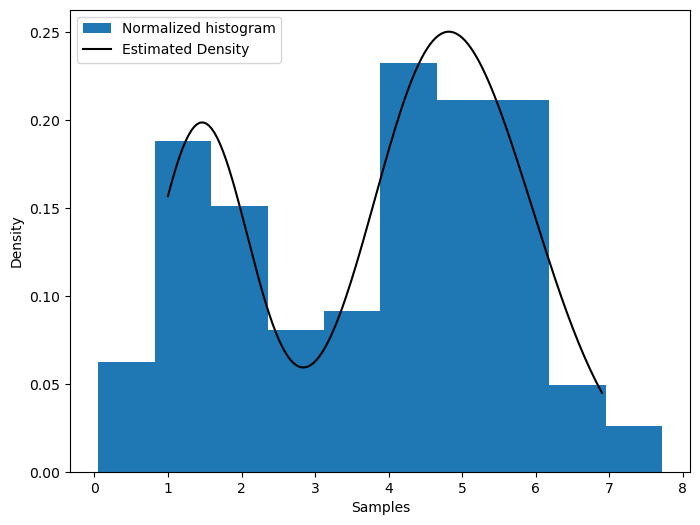

In [39]:
fig = plt.figure(figsize=(8, 6))
plt.hist(new_samples, density=True, label="Normalized histogram")
plt.plot(petal_l_xrange, kde1(petal_l_xrange), 'k-', label="Estimated Density")
plt.xlabel('Samples')
plt.ylabel('Density')
plt.legend()
plt.show();

#### Calculate the mean of the new samples and compare how close it is to the mean of the given data

In [40]:
petal_l.mean()
new_samples.mean()

3.7573333333333334

3.747682419813823

In [41]:
round(petal_l.mean()-new_samples.mean(),3)

0.01

### PCA
- Use Scikit to do PCA on the IRIS dataset
- do a bar plot that shows the importance of info in each of the new dimensions
- use PCA to reduce the number of attributes by 1.

In [42]:
dfm = df.drop("class", axis=1)
dfm.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


array([0.92482346, 0.05280611, 0.01715424, 0.00521619])

<BarContainer object of 4 artists>

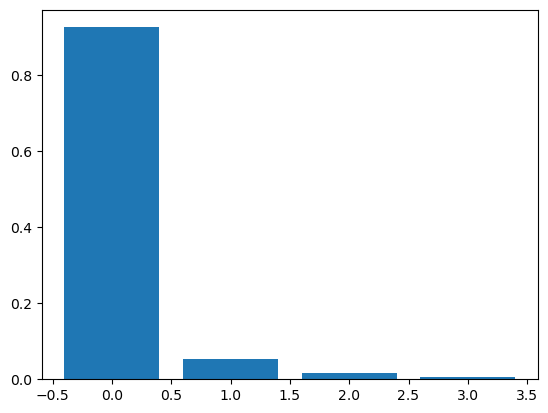

In [43]:
from sklearn.decomposition import PCA
pca = PCA()

reduced_data_pca = pca.fit_transform(dfm)
pca.explained_variance_ratio_

plt.bar(np.arange(4),pca.explained_variance_ratio_)

The plot show the importance of each variable. The 1st (sepal length) is the most important for analysis. And the last - petal width - is the least important.

#### use PCA to reduce the number of attributes by 1. Note that for all the next parts, you will use the reduced data

<BarContainer object of 3 artists>

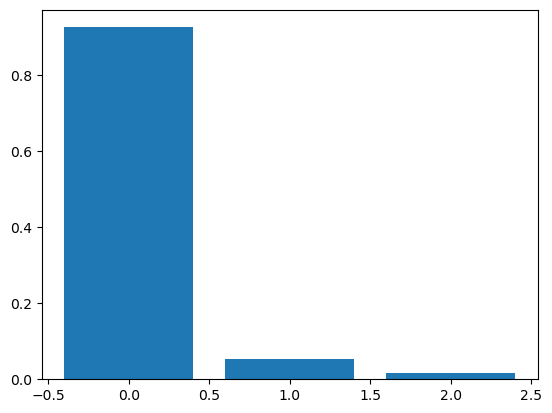

In [44]:
pca_data = PCA(n_components=3)
reduced_data_pca = pca_data.fit_transform(dfm)

plt.bar(np.arange(3),pca_data.explained_variance_ratio_)

# Part 4: Machine Learning
In this part, we will explore the use of supervised and non supervised learning using the data outcome of the PCA.

### Non-Supervised Learning 
- with Kmeans we'll divide the data into different clusters.
- we'll plot each two combination of the three dimensions together (0 vs 1), (0 vs 2), (1 vs 2).

In [45]:
from sklearn.cluster import KMeans

In [46]:
# reduced_data_pca[:,[0]]

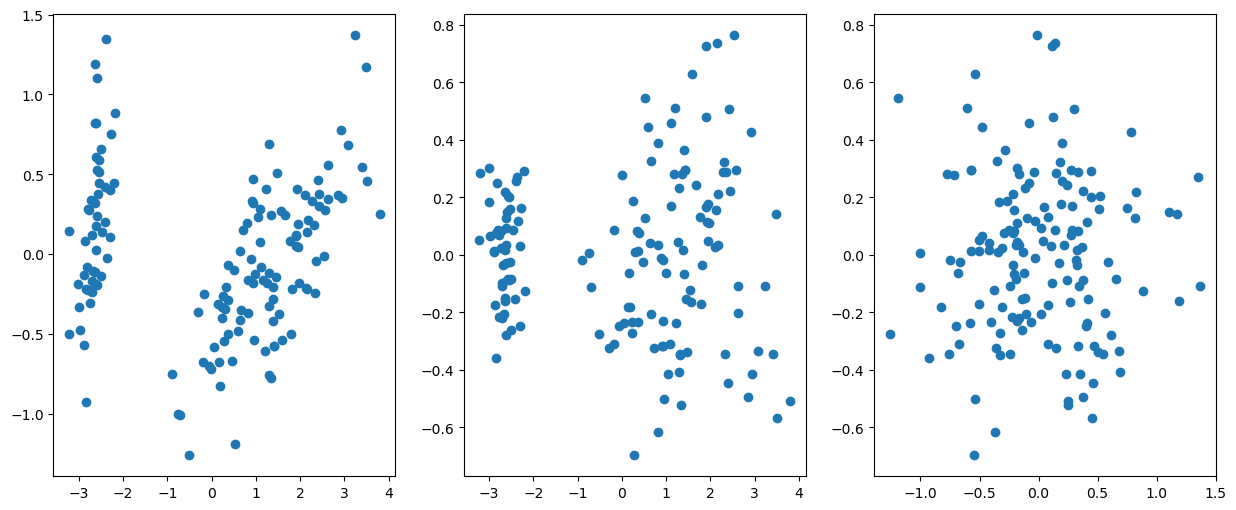

In [47]:
plt.figure(figsize = (15,6))

plt.subplot(1,3,1)
plt.scatter(reduced_data_pca[:,[0]], reduced_data_pca[:,[1]])
plt.subplot(1,3,2)
plt.scatter(reduced_data_pca[:,[0]], reduced_data_pca[:,[2]])
plt.subplot(1,3,3)
plt.scatter(reduced_data_pca[:,[1]], reduced_data_pca[:,[2]])

plt.show();

In [48]:
kmeans_model = KMeans(n_clusters=3)

kmeans_model.fit(reduced_data_pca)

KMeans(n_clusters=3)

In [49]:
print(kmeans_model.cluster_centers_) # means for each class' parameter

[[ 0.67750537 -0.31340702 -0.04387985]
 [-2.64700549  0.19038144  0.01411979]
 [ 2.37749846  0.26084641  0.05301477]]


In [50]:
labels = kmeans_model.labels_

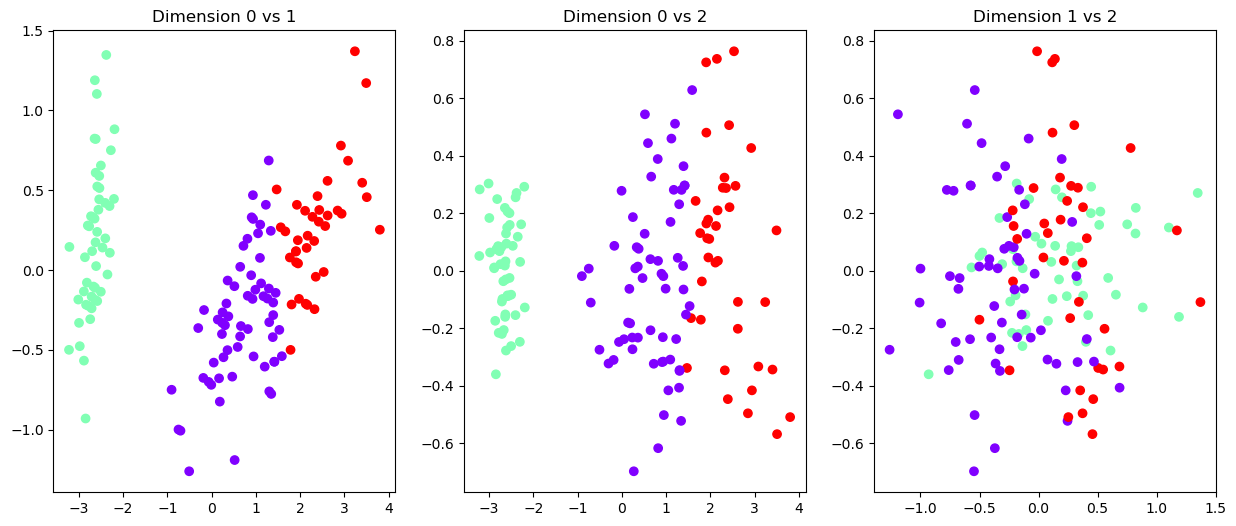

In [51]:
plt.figure(figsize=(15, 6))

# Scatter plot for dimensions 0 vs 1
plt.subplot(1, 3, 1)
plt.scatter(reduced_data_pca[:, 0], reduced_data_pca[:, 1], c=labels, cmap="rainbow")
plt.title('Dimension 0 vs 1')

# Scatter plot for dimensions 0 vs 2
plt.subplot(1, 3, 2)
plt.scatter(reduced_data_pca[:, 0], reduced_data_pca[:, 2], c=labels, cmap="rainbow")
plt.title('Dimension 0 vs 2')

# Scatter plot for dimensions 1 vs 2
plt.subplot(1, 3, 3)
plt.scatter(reduced_data_pca[:, 1], reduced_data_pca[:, 2], c=labels, cmap="rainbow")
plt.title('Dimension 1 vs 2')

plt.show();

### Supervised-Learning
- Divide to 80% training and 20% validation
- Build a Logistci regression model for the reduced IRIS dataset
- What is the training accuracy?
- What is the validation accuracy?
- Form the confusion matrix

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

In [53]:
dfr = df.drop(columns=["petal width"])
dfr.head()

,sepal length,sepal width,petal length,class
0,5.1,3.5,1.4,Iris-setosa
1,4.9,3.0,1.4,Iris-setosa
2,4.7,3.2,1.3,Iris-setosa
3,4.6,3.1,1.5,Iris-setosa
4,5.0,3.6,1.4,Iris-setosa


In [54]:
data = dfr[['sepal length','sepal width','petal length']]
target = dfr['class']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=17)

In [56]:
len(X_train)

120

In [57]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [58]:
logisticRegr.coef_ # coefficients for log.regression equation

array([[-0.43936129,  0.9507647 , -2.59167646],
       [ 0.69833327, -0.58975527, -0.53799765],
       [-0.25897198, -0.36100943,  3.12967411]])

done with building the model

In [59]:
y_prediction = logisticRegr.predict(X_test)
y_prediction
len(y_prediction)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor'], dtype=object)

30

Scores

In [60]:
# training accuracy
score_test = logisticRegr.score(X_train, y_train)
score_test

0.9583333333333334

In [61]:
# validation accuracy
score_train = logisticRegr.score(X_test, y_test)
score_train

0.9666666666666667

In [62]:
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_prediction)
print(cm)

[[ 7  0  0]
 [ 0 11  0]
 [ 0  1 11]]


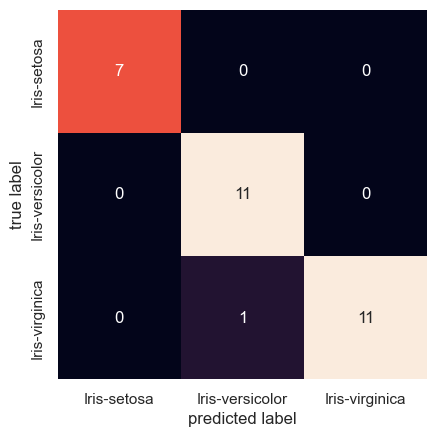

In [63]:
classes = target.unique()
sns.set()
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False, xticklabels=classes, yticklabels=classes)
plt.ylabel('true label')
plt.xlabel('predicted label');

Out of 30 tests the model predicted correctly:
- Iris setosa: 7 times
- Iris versicolor: 11 times
- Iris virginica: 11 times